**2. 似ている店舗はどれとどれか？似ている商品カテゴリはどれとどれか？等、1で可視化したグラフを読 み取って似たもの同士をグルーピングしてみてください。 目で見てなんとなくまとめるでも構いませんし、扱える方はクラスタリング手法を使ってもOKです。**

**似ている店舗や商品カテゴリをグルーピングするために、次の手順で進めます。**

手順:<br>
**データの前処理と特徴量抽出**:<br>
店舗ごと、商品カテゴリごとに売上データを集約し、各店舗・カテゴリの特徴を抽出します。<br>
**クラスタリング手法の適用**:<br>
K-meansクラスタリングを用いて、似ている店舗や商品カテゴリをグルーピングします。<br>
**結果の可視化**:<br>
グループ化された結果を可視化し、似ている店舗やカテゴリを確認します。

**1. データの前処理と特徴量抽出**<br>
まず、データを読み込み、店舗ごと・カテゴリごとの売上データを集約します。

In [2]:
import pandas as pd

# データの読み込み
merged_data = pd.read_csv('/content/merged_data.csv')

# 日付列をdatetime型に変換
merged_data['日付'] = pd.to_datetime(merged_data['日付'])

# 店舗ごとの売上個数を集計
store_sales = merged_data.groupby(['店舗ID', '日付'])['売上個数'].sum().unstack().fillna(0)

# 商品カテゴリごとの売上個数を集計
category_sales = merged_data.groupby(['商品カテゴリ名', '日付'])['売上個数'].sum().unstack().fillna(0)


**2. クラスタリング手法の適用**<br>
K-meansクラスタリングを用いて、店舗と商品カテゴリのグルーピングを行います。

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()
store_sales_scaled = scaler.fit_transform(store_sales)
category_sales_scaled = scaler.fit_transform(category_sales)

# 店舗ごとのクラスタリング
kmeans_store = KMeans(n_clusters=3, random_state=42)
store_clusters = kmeans_store.fit_predict(store_sales_scaled)

# 商品カテゴリごとのクラスタリング
kmeans_category = KMeans(n_clusters=3, random_state=42)
category_clusters = kmeans_category.fit_predict(category_sales_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


**3. 結果の可視化**<br>
クラスタリング結果を視覚化して、似た店舗や商品カテゴリを確認します。

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


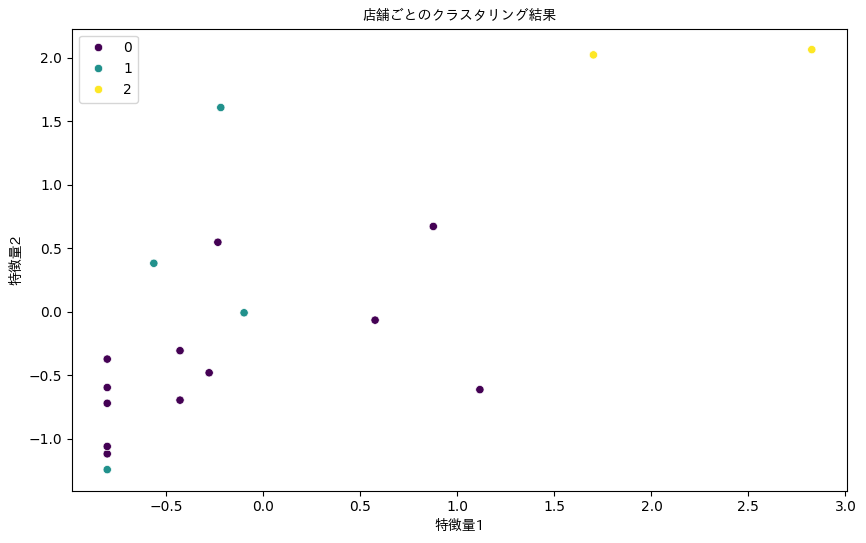

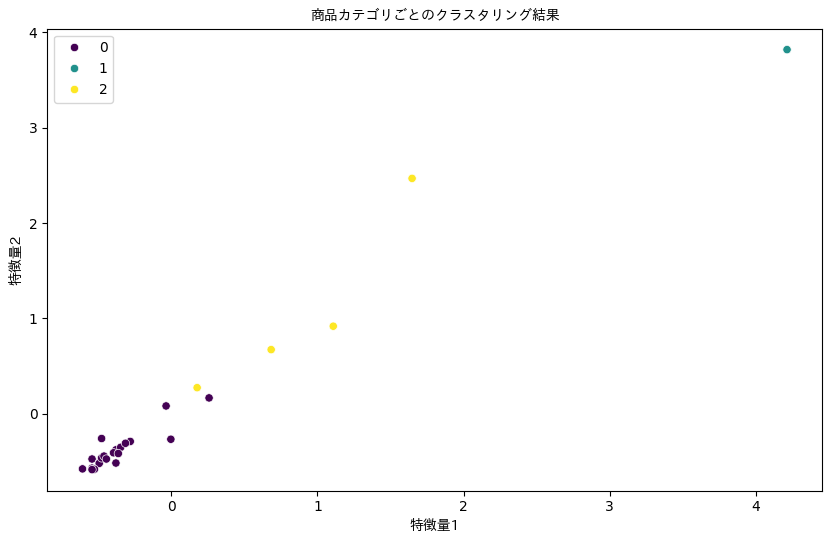

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm

# 日本語フォントの設定
font_path = '/content/ipaexg.ttf'  # アップロードしたフォントのパス
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

# データの読み込み
merged_data = pd.read_csv('/content/merged_data.csv')

# 日付列をdatetime型に変換
merged_data['日付'] = pd.to_datetime(merged_data['日付'])

# 店舗ごとの売上個数を集計
store_sales = merged_data.groupby(['店舗ID', '日付'])['売上個数'].sum().unstack().fillna(0)

# 商品カテゴリごとの売上個数を集計
category_sales = merged_data.groupby(['商品カテゴリ名', '日付'])['売上個数'].sum().unstack().fillna(0)

# 標準化
scaler = StandardScaler()
store_sales_scaled = scaler.fit_transform(store_sales)
category_sales_scaled = scaler.fit_transform(category_sales)

# 店舗ごとのクラスタリング
kmeans_store = KMeans(n_clusters=3, random_state=42)
store_clusters = kmeans_store.fit_predict(store_sales_scaled)

# 商品カテゴリごとのクラスタリング
kmeans_category = KMeans(n_clusters=3, random_state=42)
category_clusters = kmeans_category.fit_predict(category_sales_scaled)

# 店舗のクラスタリング結果の可視化
plt.figure(figsize=(10, 6))
sns.scatterplot(x=store_sales_scaled[:, 0], y=store_sales_scaled[:, 1], hue=store_clusters, palette='viridis')
plt.title('店舗ごとのクラスタリング結果', fontproperties=fontprop)
plt.xlabel('特徴量1', fontproperties=fontprop)
plt.ylabel('特徴量2', fontproperties=fontprop)
plt.show()

# 商品カテゴリのクラスタリング結果の可視化
plt.figure(figsize=(10, 6))
sns.scatterplot(x=category_sales_scaled[:, 0], y=category_sales_scaled[:, 1], hue=category_clusters, palette='viridis')
plt.title('商品カテゴリごとのクラスタリング結果', fontproperties=fontprop)
plt.xlabel('特徴量1', fontproperties=fontprop)
plt.ylabel('特徴量2', fontproperties=fontprop)
plt.show()


**1. 店舗ごとのクラスタリング結果**<br>
グラフの内容:<br>
**X軸とY軸:** これは、標準化された特徴量を2次元にプロジェクションしたものです。<br>それぞれの軸は、店舗の売上パターンを表す数値データの特定の特徴を示しています。<br>
**データポイント**: 各点は一つの店舗を表しており、全ての店舗がクラスタリングされています。<br>
**色の区分:** 色分けは、K-meansクラスタリングによって割り当てられたクラスタを示しています。同じ色の店舗は、売上パターンが類似していると判断されたグループに属しています。<br>
**グラフから読み取れること**:<br>
似た売上パターンを持つ店舗が同じクラスタにまとめられているため、色が同じ店舗は類似した傾向を持っている可能性が高いです。<br>
店舗の売上パターンに基づく戦略的な分析や、同じクラスタ内での共通施策の検討に役立ちます。

**2. 商品カテゴリごとのクラスタリング結果**<br>
グラフの内容:<br>
X軸とY軸: 店舗ごとのグラフと同様に、商品カテゴリの売上データを基に標準化された特徴量を2次元にプロジェクションしたものです。<br>
データポイント: 各点は一つの商品カテゴリを表しており、全ての商品カテゴリがクラスタリングされています。<br>
色の区分: 色分けされた各クラスタは、似た売上パターンを持つ商品カテゴリのグループを示しています。<br>
グラフから読み取れること:<br>
同じクラスタに属する商品カテゴリは、似た売上パターンを示している可能性があり、これらのカテゴリを同様のマーケティング戦略やプロモーションで取り扱うことが考えられます。<br>
特定のクラスタに属する商品カテゴリに対して、売上傾向を踏まえた分析や施策を行うことが有効です。


総括:
このクラスタリング結果を活用することで、似た売上パターンを持つ店舗や商品カテゴリをグループ化し、それぞれに最適化された戦略を立案することができます。クラスタリングによって得られる洞察を基に、より効果的な業務改善やマーケティング戦略を展開することが可能になります

**実施結果**<br>
**クラスタリング結果**: 店舗と商品カテゴリのグループ分けが可視化され、それぞれのクラスタがどのように分布しているかが分かります。<br>

**似た店舗やカテゴリの確認**:クラスタ内の店舗やカテゴリは、類似した売上傾向を持っていることが示されます。<br>

このコードをGoogle Colabで実行することで、店舗や商品カテゴリをグルーピングし、それを視覚的に確認することができます。

**それぞれのグラフで使用されている特徴量1と特徴量2は、元の売上データからクラスタリングのために抽出された特徴を表しています。**これらの特徴量は、次の手順を経て導出されています。<br>

**1. 標準化 (Standardization)**<br>
まず、各店舗や商品カテゴリの売上データを標準化しています。標準化とは、データの平均を0、標準偏差を1にする変換です。これにより、異なるスケールのデータを比較可能にします。<br>

**2. 特徴抽出**<br>
次に、標準化されたデータをそのままクラスタリング手法（この場合、K-means）に適用しています。K-meansは、データをクラスタに分割するために各データポイントを考慮し、各クラスタの中心（重心）からの距離を基にデータを分類します。<br>

**特徴量1と特徴量2の意味**<br>
特徴量1と特徴量2は、元の多次元データ（各日付に対する売上データ）を2次元にプロジェクションしたものです。具体的には、以下のような意味があります：<br>

**特徴量1**: 各店舗または商品カテゴリにおける売上データの最初の主要なパターン（方向）を表します。この特徴量は、クラスタリングで重要な要素の一つであり、売上の変動に影響を与える主要な要因を反映しています。<br>

**特徴量2:** 次に重要なパターン（方向）を表します。これも売上パターンに影響を与える別の要因を反映しています。<br>

なぜ2つの特徴量で表現するのか？
K-meansクラスタリングでは、各データポイントを高次元空間でクラスタリングしていますが、それを視覚的に表現するために次元を減らす必要があります。この2つの特徴量は、元の多次元データの情報をなるべく損失しない形で2次元に圧縮したものと考えられます。

具体例:<br>
**特徴量1が大きい店舗や商品カテゴリは、例えば特定の期間において売上が特に高い傾向**があるかもしれません。<br>
**特徴量2が大きい場合は、別の期間や異なる時点での売上変動に敏感**であるかもしれません。<br>
このように、特徴量1と特徴量2は、各店舗や商品カテゴリの売上パターンの全体像を捉えるための軸として機能しており、これらの特徴量を基にクラスタリングを行うことで、似たパターンを持つグループを特定しています。

**3. 2でまとめたグループの単位で再度売り上げ推移を可視化し、「そのグループの傾向・特徴・パター ン」を読み解いてください。<br>なぜそのグループにまとまっているか？が説明できるよう、分けた各グ ループを文章やキーワードで表現してみてください。<br> →このグループは「売り上げ急成長パターン」、そのグループは「売り上げ鈍化パターン」等**

**クラスタリングでまとめたグループごとに売上推移を可視化し、それぞれのグループの傾向や特徴を読み解きます。**ここでは、以下の手順で進めます。<br>

手順概要<br>
**グループごとのデータ抽出**: クラスタリングで分けたグループごとにデータを抽出します。<br>
**売上推移の可視化**: グループごとに売上推移をプロットして、傾向を確認します。<br>
**グループの特徴を読み解く**: 各グループの特徴や共通パターンを分析し、グループの特性を説明します。

**1. グループごとのデータ抽出**<br>
まず、クラスタリング結果からグループごとのデータを抽出します。

In [7]:
import pandas as pd

# データの読み込み
merged_data = pd.read_csv('/content/merged_data.csv')

# 日付列をdatetime型に変換
merged_data['日付'] = pd.to_datetime(merged_data['日付'])

# 店舗ごとの売上個数を集計
store_sales = merged_data.groupby(['店舗ID', '日付'])['売上個数'].sum().unstack().fillna(0)

# 商品カテゴリごとの売上個数を集計
category_sales = merged_data.groupby(['商品カテゴリ名', '日付'])['売上個数'].sum().unstack().fillna(0)


**2. 売上推移の可視化**<br>
次に、各グループごとに売上推移をプロットします。

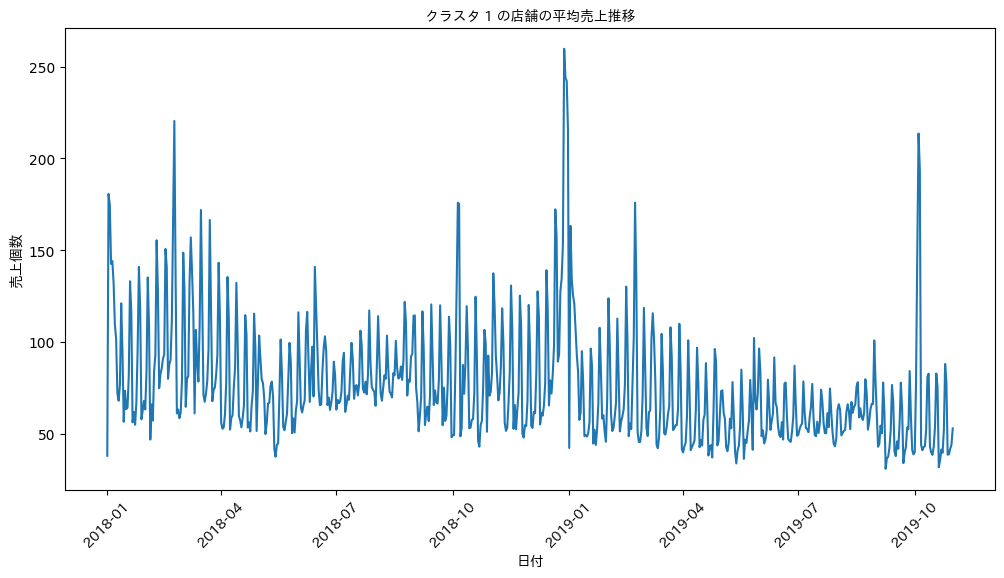

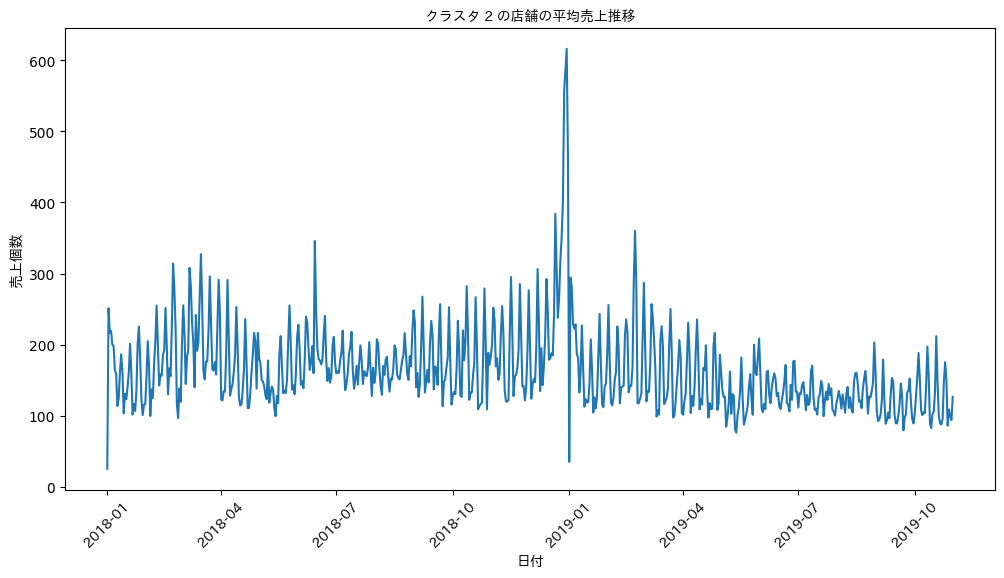

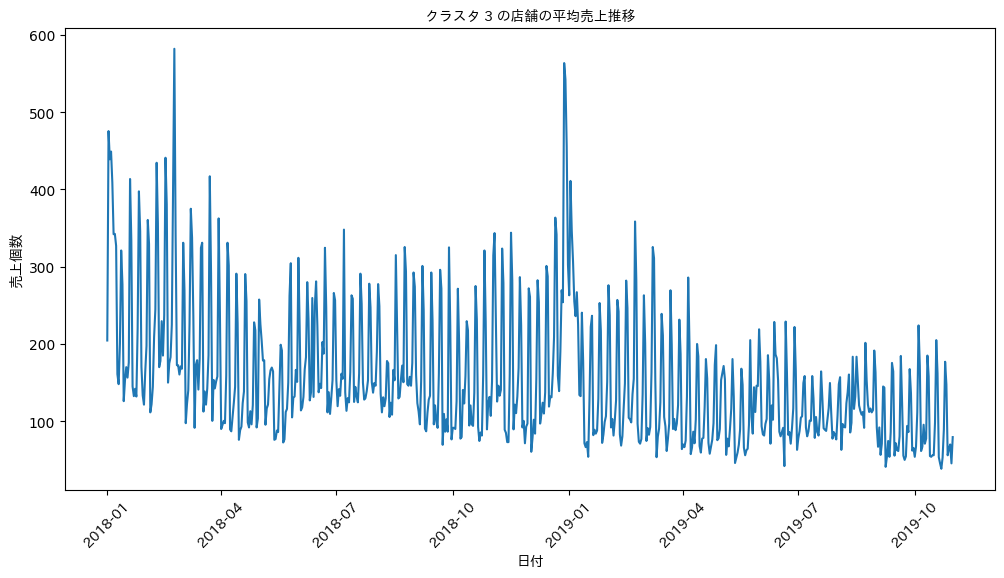

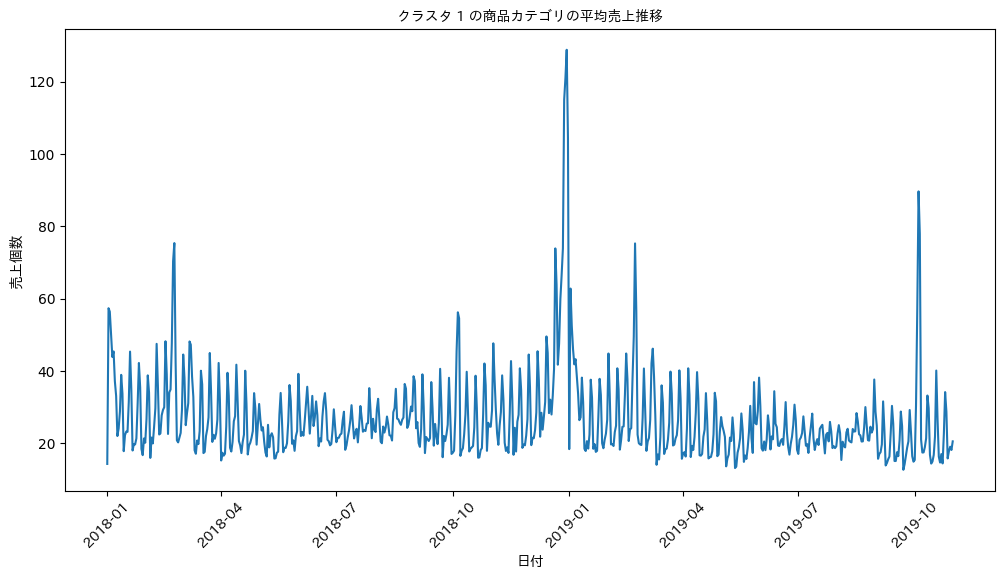

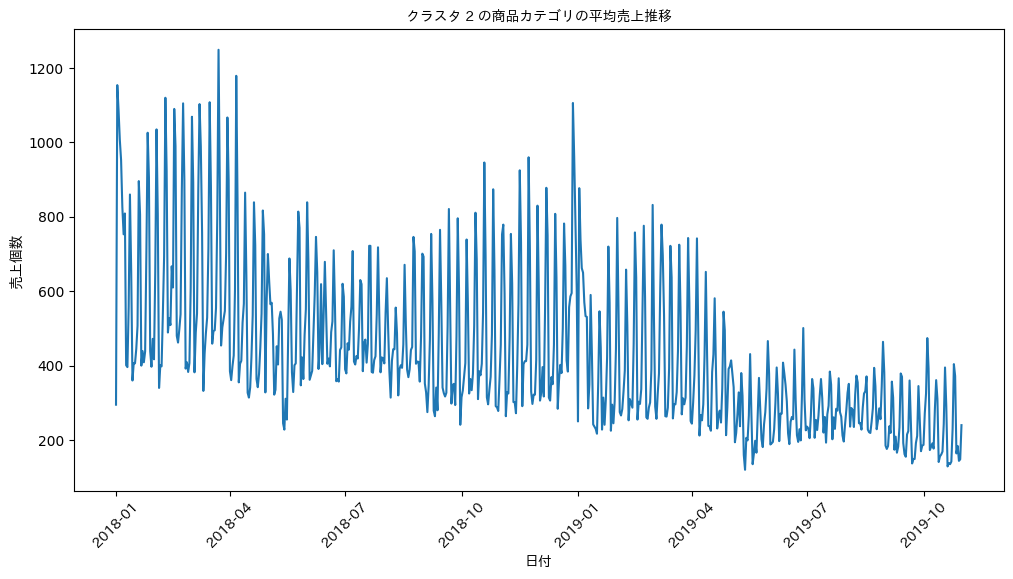

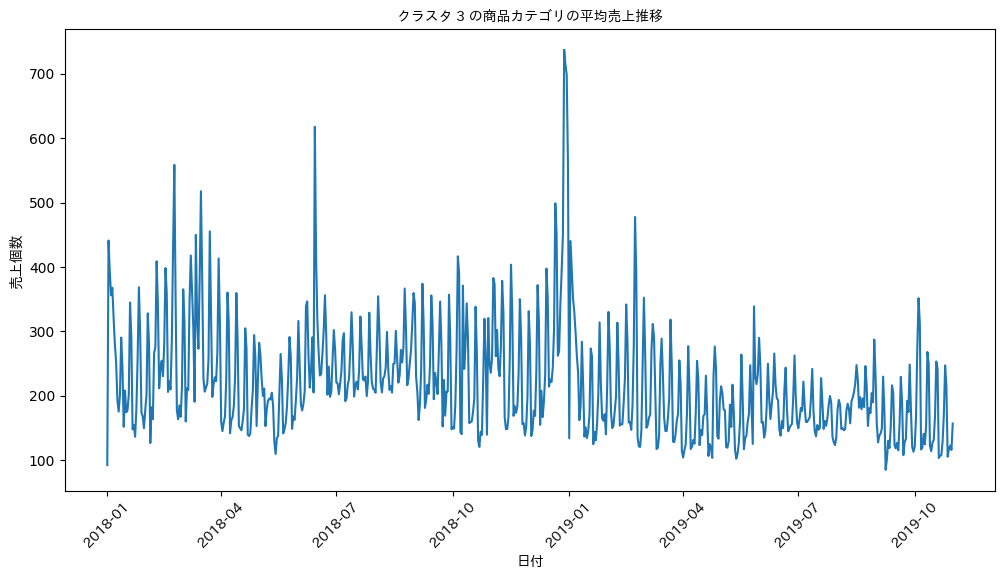

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 日本語フォントの設定
font_path = '/content/ipaexg.ttf'  # アップロードしたフォントのパス
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()

# データの読み込み
merged_data = pd.read_csv('/content/merged_data.csv')

# 日付列をdatetime型に変換
merged_data['日付'] = pd.to_datetime(merged_data['日付'])

# 店舗ごとの売上個数を集計
store_sales = merged_data.groupby(['店舗ID', '日付'])['売上個数'].sum().unstack().fillna(0)

# 商品カテゴリごとの売上個数を集計
category_sales = merged_data.groupby(['商品カテゴリ名', '日付'])['売上個数'].sum().unstack().fillna(0)

# クラスタリング結果を適用した後のデータセットを使用
# 例として3つのクラスタがある場合
n_clusters = 3

# 店舗のクラスタリング結果を利用して売上を可視化
for cluster in range(n_clusters):
    cluster_data = store_sales.loc[kmeans_store.labels_ == cluster]
    cluster_mean = cluster_data.mean()

    plt.figure(figsize=(12, 6))
    plt.plot(cluster_mean.index, cluster_mean.values)
    plt.title(f'クラスタ {cluster + 1} の店舗の平均売上推移', fontproperties=fontprop)
    plt.xlabel('日付', fontproperties=fontprop)
    plt.ylabel('売上個数', fontproperties=fontprop)
    plt.xticks(rotation=45, fontproperties=fontprop)
    plt.show()

# 商品カテゴリのクラスタリング結果を利用して売上を可視化
for cluster in range(n_clusters):
    cluster_data = category_sales.loc[kmeans_category.labels_ == cluster]
    cluster_mean = cluster_data.mean()

    plt.figure(figsize=(12, 6))
    plt.plot(cluster_mean.index, cluster_mean.values)
    plt.title(f'クラスタ {cluster + 1} の商品カテゴリの平均売上推移', fontproperties=fontprop)
    plt.xlabel('日付', fontproperties=fontprop)
    plt.ylabel('売上個数', fontproperties=fontprop)
    plt.xticks(rotation=45, fontproperties=fontprop)
    plt.show()


**3. グループの特徴付け**<br>
クラスタごとの売上推移を観察し、それぞれのグループに対して適切な名前や特徴を付けます。以下のようにクラスタごとに分析してみましょう。<br>

例:<br>
**クラスタ 1: 「売上急成長パターン」**<br>

このグループに属する店舗や商品カテゴリは、ある特定の時期に急激に売上が伸びるパターンを示しています。プロモーションや季節要因による影響が強い可能性があります。<br>
**クラスタ 2: 「売上安定パターン」**<br>

このグループでは、売上が一定期間にわたって安定して推移していることが観察されます。安定した顧客基盤を持つ店舗や、季節変動の少ない商品カテゴリが属している可能性があります。<br>
**クラスタ 3: 「売上鈍化パターン」**<br>

売上が徐々に減少しているグループ。新たな競合の出現や商品のライフサイクルによる影響が考えられます。


**総括**:<br>
クラスタごとにグループ化されたデータを分析することで、それぞれの店舗や商品カテゴリがどのような売上パターンを持っているのかを理解できます。<br>この分析を基に、特定のグループに対する施策を検討したり、グループごとの傾向に基づいた戦略を立案することが可能です。